# Exploring CITES wildlife trade data

This notebook I've done a basic exploration of the data values in the CITES wildlife trade dataset. This dataset covers all legal trade in wildlife species covered by the CITES international regulatory framework conducted in 2016. It's a live record of wildlife trading activity, but flawed in the fact that it doesn't capture very real, and very active black market wildlife trading activity.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

cites = pd.read_csv("../input/comptab_2018-01-29 16_00_comma_separated.csv")
fig_kwargs = {'figsize': (12, 6), 'fontsize': 16}

cites.head(3)

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W


In [2]:
cites['Year'].value_counts()

2016    67007
2017      154
Name: Year, dtype: int64

Although I asked the CITES website for an export of 2016 *and* 2017 data, after waiting for quite a while (this data took around a minute to generate!) I got a dataset with only sparse 2017 data.

As a result, you shouldn't put too much faith in the raw numerical counts of things.

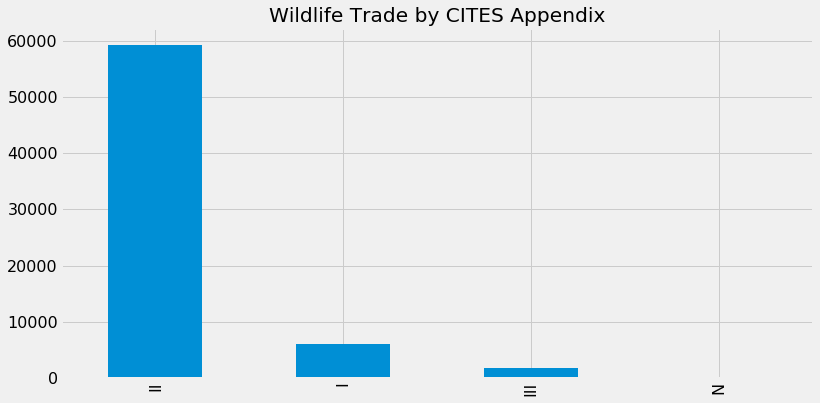

In [3]:
cites['App.'].value_counts().plot.bar(**fig_kwargs, 
                                      title="Wildlife Trade by CITES Appendix")

Not all species are covered by CITES. The ones that are, however, are divided into three appendices. From the dataset description:

> Appendix I species are those whose trade threatens them with extinction. Two particularly famous examples of Class I species are the black rhinoceros and the African elephant, whose extremely valuable tusks are an alluring target for poachers exporting ivory abroad. There are 1200 such species. Appendix II species are those not threatened with extinction, but whose trade is nevertheless detrimental. Most species in cites, around 21000 of them, are in Appendix II. Finally, Appendix III animals are those submitted to CITES by member states as a control mechanism. There are about 170 such species, and their export or import requires permits from the submitting member state(s).

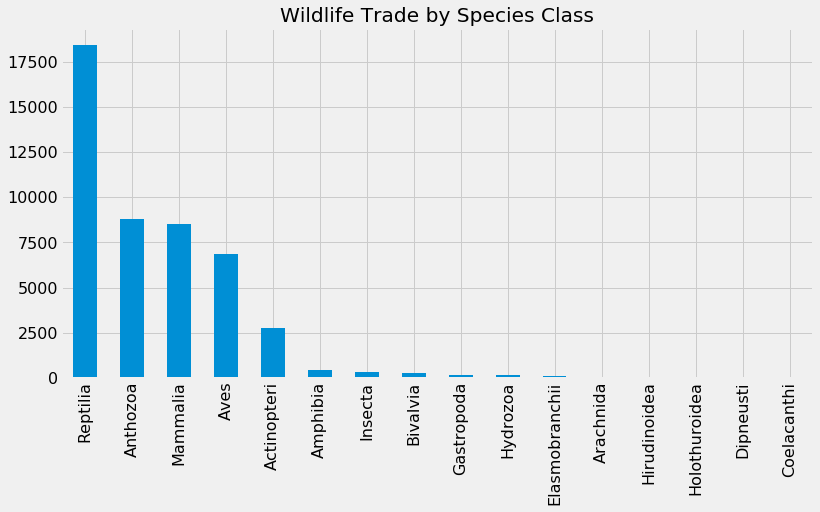

In [4]:
cites['Class'].value_counts().plot.bar(**fig_kwargs, 
                                      title="Wildlife Trade by Species Class")

We can pick up general trends about what species are traded by examining the species macro-level hierarchical classes. We see here that the most commonly traded animals on the global market at reptiles. Marine invertibrates, mammals, and birds also have a significant presence. Very few CITES-covered trades occur in insects or amphibians.

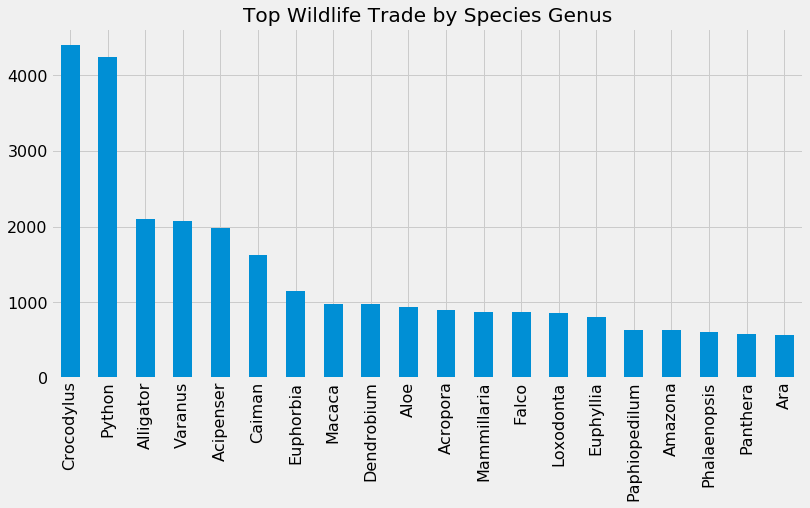

In [5]:
cites['Genus'].value_counts().head(20).plot.bar(
    **fig_kwargs, 
    title="Top Wildlife Trade by Species Genus"
)

If we zoom in all the way onto the genus of the species being traded, we see that the most popular things traded by far are crocodiles and pythons (probably both live and in the form of animal skins, which are used for truly awful fashion products).

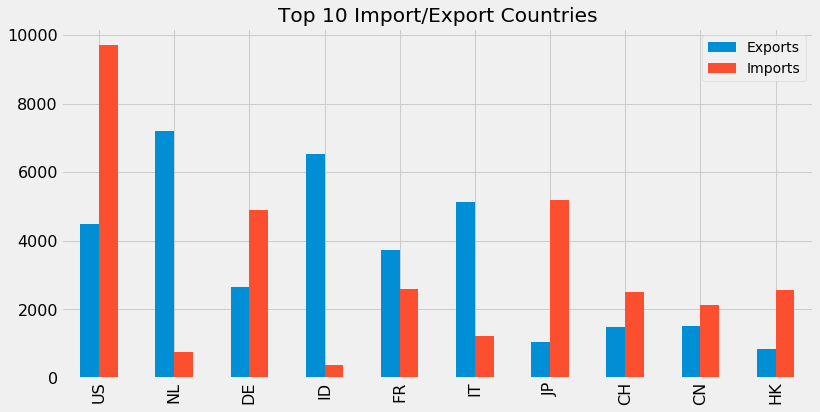

In [6]:
(pd.DataFrame()
     .assign(Exports=cites.Exporter.value_counts(), 
             Imports=cites.Importer.value_counts())
     .pipe(lambda df: df.loc[df.fillna(0).sum(axis='columns').sort_values(ascending=False).index])
     .head(10)
     .plot.bar(**fig_kwargs, title="Top 10 Import/Export Countries")
)

The US leads the way in terms of imports. Some countries are very unbalanced: the Netherlands for example exports a lot of animal products and doesn't import very many at all, for some reason? It must be a clearinghouse of some kind for the industry? Indonesia (ID), meanwhile, is a prime exporter of product.

Note that these are two-letter country codes. You can see what corresponds to what [here](https://en.wikipedia.org/wiki/ISO_3166-2).

The amount of trade activity recorded coming into and out of China (CN) is unrealistically low.

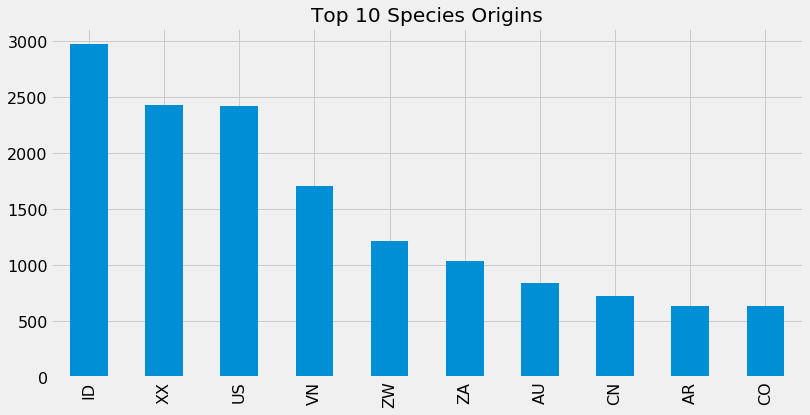

In [7]:
cites['Origin'].value_counts().head(10).plot.bar(**fig_kwargs, title="Top 10 Species Origins")

Some top contendors for species origins are Indonesia, USA, Vietnam, and "unknown" (XX).

In [8]:
cites['Term'].value_counts().tail(10)

genitalia        9
fingerlings      5
trunk            5
coral sand       4
eggshell         4
gall bladders    3
horn pieces      2
swim bladders    2
fruit            1
gall             1
Name: Term, dtype: int64

Taking a look at the _products_ being exported we see that there is, um, and interesting menu of options! But here are the most common ones:

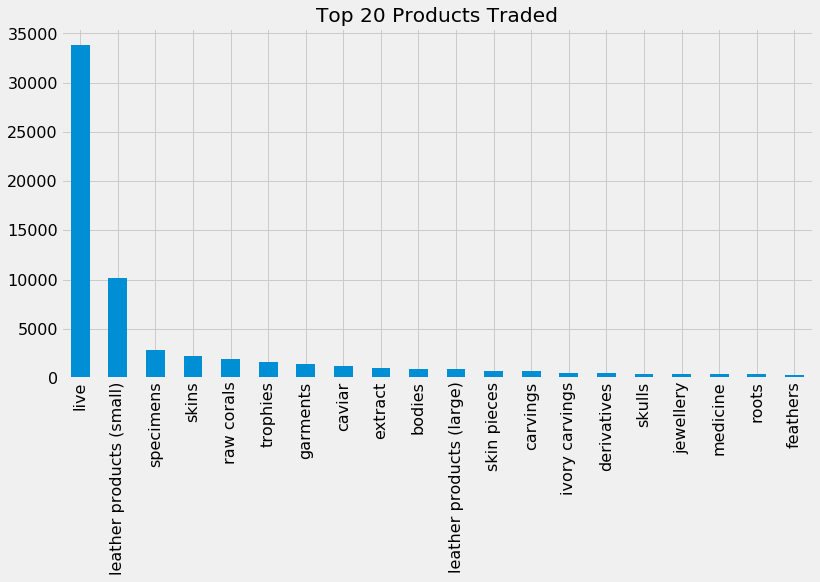

In [9]:
cites['Term'].value_counts().head(20).plot.bar(**fig_kwargs, title="Top 20 Products Traded")

Most of the time the product being exported or imported is live animals. Note that this is only in terms of raw records: it's likely that because of the permit process involved, leather products and other derivative products are shipped in bulk (for example there's one record with ~100k kilos of...whale meat), but live animals must be approved individually or in smaller batches.

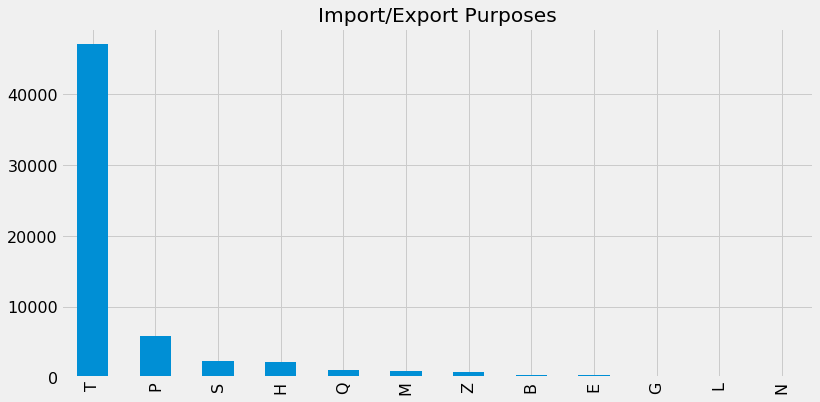

In [10]:
cites['Purpose'].value_counts().plot.bar(**fig_kwargs, title="Import/Export Purposes")

These codes are much harder to parse. You really have to take a look at [the official documentation](https://trade.cites.org/cites_trade_guidelines/en-CITES_Trade_Database_Guide.pdf) to understand them. The top import/export purposes are Commercial (T), Personal (P), Scientific (S), Hunting Trophies (ick; H), and...Circuses (Q)? Z is zoos, so it's interesting to see that more species are imported and exported for circus purposes than for zoos. Not sure what to think of that.

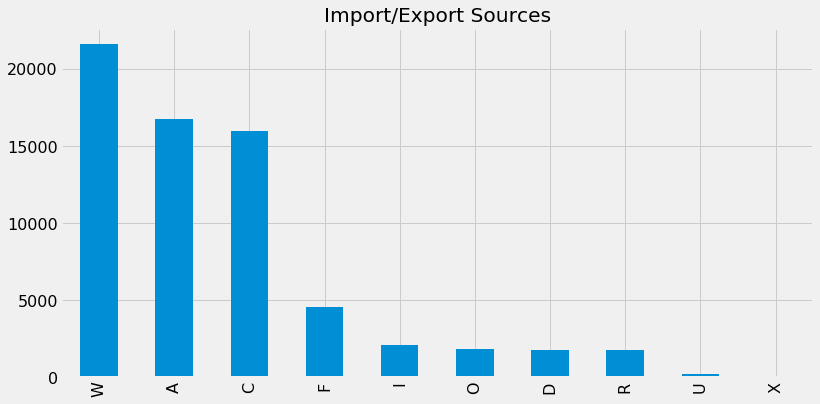

In [11]:
cites['Source'].value_counts().plot.bar(**fig_kwargs, title="Import/Export Sources")

These codes similarly require looking at the official documentation to understand. Especially because the distinctions between some of these categories are very inconcrete. However, by far the top three most common sources are wild animals (W), captive-bred animals (C), and captive-bred plants (A). The X is an interesting one: these are animals taken from the marine environment outside of the jurisdiction of any state. I wonder falls under that category.

That concludes our basic EDA of this dataset. Hopefully you will find this notebook useful in your own analysis!